<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last updated: 24th March, 2024
# Holi festival

Note on LLMs
===========

Most LLMs are not trained to be fact machines. They know how to use
language, but they might not know who won the big sporting event last year. It’s always important to fact check and understand the responses before
using them as a reference.

LLM use cases
=============

Here are just a few examples of common use cases for large language models:  

CHATBOTS AND VIRTUAL ASSISTANTS: One of the most common implementations, LLMs can be used by organizations to provide help with things like customer support,
troubleshooting, or even having open-ended conversations with user-
provided prompts.  

CODE GENERATION AND DEBUGGING: LLMs can be trained on large amounts of code examples and give useful code snippets as a response to a request written in natural language. With the proper techniques, LLMs can also be built in a way to reference other relevant data that it may not have been trained with, such as a company’s documentation, to help provide more accurate responses.  

SENTIMENT ANALYSIS: Often a hard task to quantify, LLMs can help take a piece of text and gauge emotion and opinions. This can help organizations gather the data and feedback needed to improve customer satisfaction.  

TEXT CLASSIFICATION AND CLUSTERING: The ability to categorize and sort large volumes of data enables the identification of common themes and trends, supporting informed decision-making and more targeted strategies.   

LANGUAGE TRANSLATION:  Globalize all your content without hours of painstaking work by simplyfeeding your web pages through the proper LLMs and translating them to different languages. As more LLMs are trained in other languages, quality and availability will continue to improve.  

SUMMARIZATION AND PARAPHRASING: Entire customer calls or meetings could be efficiently summarized so that others can more easily digest the content. LLMs can take large amounts of text and boil it down to just the most important bytes.    

CONTENT GENERATION: Start with a detailed prompt and have an LLM develop an outline for you. Then continue on with those prompts and LLMs can generate a good first draft for you to build off. Use them to brainstorm ideas, and ask the LLM questions to help you draw inspiration from.



Proprietary services
===================

As the first widely available LLM powered service, OpenAI’s ChatGPT was the
explosive charge that brought LLMs into the mainstream. ChatGPT provides
a nice user interface (or API) where users can feed prompts to one of many
models (GPT-3.5, GPT-4, and more) and typically get a fast response. These are
among the highest-performing models, trained on enormous data sets, and are
capable of extremely complex tasks both from a technical standpoint, such as
code generation, as well as from a creative perspective like writing poetry in a
specific style.
The downside of these services is the absolutely enormous amount of compute
required not only to train them (OpenAI has said GPT-4 cost them over $100
million to develop) but also to serve the responses. For this reason, these
extremely large models will likely always be under the control of organizations,
and require you to send your data to their servers in order to interact with their
language models. This raises privacy and security concerns, and also subjects
users to “black box” models, whose training and guardrails they have no control
over. Also, due to the compute required, these services are not free beyond a
very limited use, so cost becomes a factor in applying these at scale.
In summary: Proprietary services are great to use if you have very complex tasks,
are okay with sharing your data with a third party, and are prepared to incur
costs if operating at any significant scale.


Open source models
==================

The other avenue for language models is to go to the open source community,
where there has been similarly explosive growth over the past few years.
Communities like Hugging Face gather hundreds of thousands of models
from contributors that can help solve tons of specific use cases such as text
generation, summarization and classification. The open source community has
been quickly catching up to the performance of the proprietary models, but
ultimately still hasn’t matched the performance of something like GPT-4.  

It does currently take a little bit more work to grab an open source model and
start using it, but progress is moving very quickly to make them more accessible
to users. On Databricks, for example, we’ve made improvements to open source
frameworks like MLflow to make it very easy for someone with a bit of Python
experience to pull any Hugging Face transformer model and use it as a Python
object. Oftentimes, you can find an open source model that solves your specific
problem that is orders of magnitude smaller than ChatGPT, allowing you to bring
the model into your environment and host it yourself. This means that you can
keep the data in your control for privacy and governance concerns as well as
manage your costs.  

Another huge upside to using open source models is the ability to fine-tune
them to your own data. Since you’re not dealing with a black box of a proprietary service, there are techniques that let you take open source models and train them to your specific data, greatly improving their performance on your specific domain. We believe the future of language models is going to move
in this direction, as more and more organizations will want full control and
understanding of their LLMs.

# Sentence Transformers

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Sentences we want to encode. Example:
sentence = ['This framework generates embeddings for each input sentence']

# Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)

In [ ]:
embedding.shape  # (1,384)


(1, 384)

## [Semantic Search](https://www.sbert.net/examples/applications/semantic-search/README.html)
Or query search

Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.
Background

The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.

At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

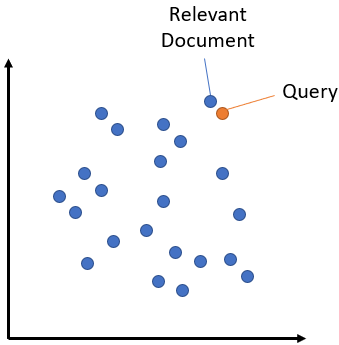

A critical distinction for your setup is symmetric vs. asymmetric semantic search:

>For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.

>For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you want to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

It is critical that you choose the right model for your type of task.

>Suitable models for symmetric semantic search: [Pre-Trained Sentence Embedding Models](https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models)

>Suitable models for asymmetric semantic search: [Pre-Trained MS MARCO Models](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html)

For small corpora (up to about 1 million entries) we can compute the cosine-similarity between the query and all entries in the corpus. In the following example, we define a small corpus with few example sentences and compute the embeddings for the corpus as well as for our query. We then use the `util.cos_sim()` function to compute the cosine similarity between the query and all corpus entries. For large corpora, sorting all scores would take too much time. Hence, we use `torch.topk` to only get the top k entries.  

For other examples see github [here](https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/semantic-search).  
An example *symmetric* model that we use in KNIME is `all-MiniLM-L6-v2-f16.gguf`

In [ ]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example sentences
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
    "A woman is playing violin.",
    "Two men pushed carts through the woods.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "A cheetah is running behind its prey.",
]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "A man is eating pasta.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah chases prey on across a field.",
]


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

## Approximate Nearest Neighbor

Searching a large corpus with millions of embeddings can be time-consuming if exact nearest neighbor search is used (like it is used by util.semantic_search).

In that case, *Approximate Nearest Neighbor (ANN)* can be helpful. Here, the data is partitioned into smaller fractions of similar embeddings. This index can be searched efficiently and the embeddings with the highest similarity (the nearest neighbors) can be retrieved within milliseconds, even if you have millions of vectors.

However, the results are not necessarily exact. It is possible that some vectors with high similarity will be missed. That’s the reason why it is called approximate nearest neighbor.

For all ANN methods, there are usually one or more parameters to tune that determine the recall-speed trade-off. If you want the highest speed, you have a high chance of missing hits. If you want high recall, the search speed decreases.

Three popular libraries for approximate nearest neighbor are `Annoy`, `FAISS`, and `hnswlib`. Some find `hnswlib` the most suitable library: It is easy to use, offers a great performance and has nice features included that are important for real applications.   
In KNIME we use [FAISS](https://github.com/facebookresearch/faiss)

## Retrieve & Re-Rank
See this [link](https://www.sbert.net/examples/applications/retrieve_rerank/README.html)

For complex semantic search scenarios, a retrieve & re-rank pipeline is advisable:

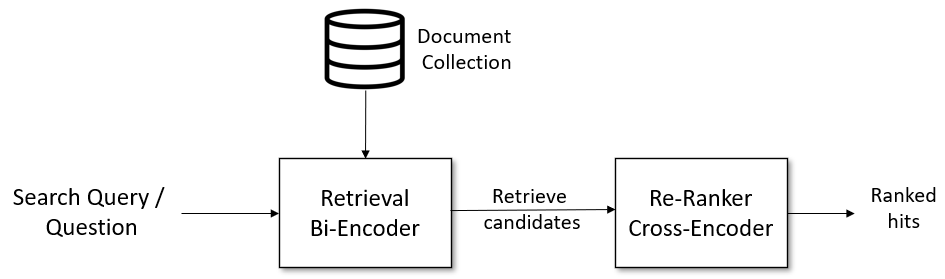

Given a search query, we first use a retrieval system that retrieves a large list of e.g. 100 possible hits which are potentially relevant for the query. For the retrieval, we can use either lexical search, e.g. with Elasticsearch, or we can use dense retrieval with a bi-encoder.

However, the retrieval system might retrieve documents that are not that relevant for the search query. Hence, in a second stage, we use a re-ranker based on a cross-encoder that scores the relevancy of all candidates for the given search query.

The output will be a ranked list of hits we can present to the user.
Retrieval: Bi-Encoder

For the retrieval of the candidate set, we can either use lexical search (e.g. Elasticsearch), or we can use a bi-encoder which is implemented in this repository.

Lexical search looks for literal matches of the query words in your document collection. It will not recognize synonyms, acronyms or spelling variations. In contrast, semantic search (or dense retrieval) encodes the search query into vector space and retrieves the document embeddings that are close in vector space.  
The output will be a ranked list of hits we can present to the user.

### Retrieval: Bi-Encoder


For the retrieval of the candidate set, we can either use lexical search (e.g. Elasticsearch), or we can use a bi-encoder which is implemented in this repository.

Lexical search looks for literal matches of the query words in your document collection. It will not recognize synonyms, acronyms or spelling variations. In contrast, semantic search (or dense retrieval) encodes the search query into vector space and retrieves the document embeddings that are close in vector space.  
Semantic search overcomes the short comings of lexical search and can recognize synonym and acronyms. Have a look at the semantic search article for different options to implement semantic search.

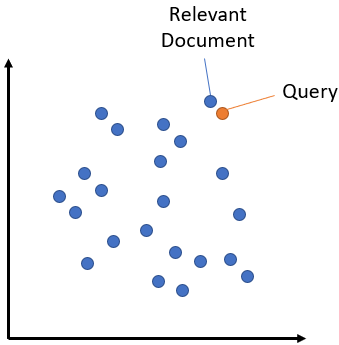

### Re-Ranker: Cross-Encoder

The retriever has to be efficient for large document collections with millions of entries. However, it might return irrelevant candidates.

A re-ranker based on a Cross-Encoder can substantially improve the final results for the user. The query and a possible document is passed simultaneously to transformer network, which then outputs a single score between 0 and 1 indicating how relevant the document is for the given query.

CrossEncoder

The advantage of Cross-Encoders is the higher performance, as they perform attention across the query and the document.

Scoring thousands or millions of (query, document)-pairs would be rather slow. Hence, we use the retriever to create a set of e.g. 100 possible candidates which are then re-ranked by the Cross-Encoder.

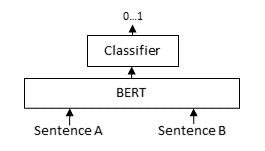

The advantage of Cross-Encoders is the higher performance, as they perform attention across the query and the document.

Scoring thousands or millions of (query, document)-pairs would be rather slow. Hence, we use the retriever to create a set of e.g. 100 possible candidates which are then re-ranked by the Cross-Encoder.   
Examples of pre-trained cross-encoders is [here](https://www.sbert.net/docs/pretrained-models/ce-msmarco.html)

## How FAISS works
See [here](https://towardsdatascience.com/understanding-faiss-619bb6db2d1a)

Let’s use the story above (not described here) as an analogy.

>All the citizens of the kingdom are the vectors in a database and the three tribes correspond to three separate “clusters” or “cells”. The vectors are then assigned to one of these three clusters depending upon a certain similarity measure .(Remember the tribes practised different set of skills that set them apart from each other?). Usually the L2 distance measure along with a clustering algorithm like K-means is used for this.

>Like the tribe chiefs in our story, each cluster is represented by a cluster centroid or “code” . And just like the ministers’ “master book” , a separate “codebook” is maintained that keeps track of the code (or cluster centroid) and its corresponding vectors for each cluster. This is essentially the “Inverted File” or index.

>A Quantiser is used to decide which cluster the vector belongs to (I guess this was primarily the queen’s job). So when a query vector comes in (like the travellers in our story), a suitable cluster (or clusters) is found for the query vector based on its similarity with the cluster centres (just like the tribe chiefs who selected the travellers based on their characteristics). Finally, a select number of similar vectors within the selected cluster(s) that are returned as the query result (like the citizens of the city who volunteered to house a traveller). This can be seen as a very basic working of the inverted index.

Faiss allows us to add multiple steps that can optimize our search using many different methods. A popular approach is to partition the index into Voronoi cells.

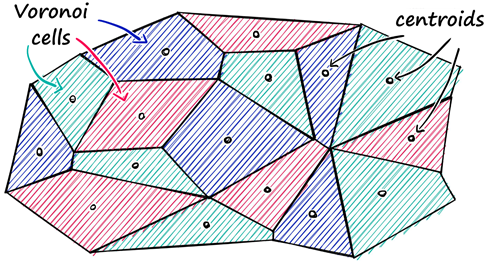

Using this method, we would take a query vector `xq`, identify the cell it belongs to, and then use our `IndexFlatL2` (or another metric) to search between the query vector and all other vectors belonging to that specific cell.

So, we are reducing the scope of our search, producing an approximate answer, rather than exact (as produced through exhaustive search).

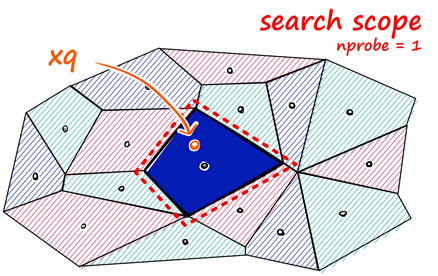

## What is vector store
References: [Here](https://www.pinecone.io/learn/vector-database/) and [Here](https://aws.amazon.com/what-is/vector-databases/)

A vector database indexes and stores vector embeddings for fast retrieval and similarity search, with capabilities like CRUD operations, metadata filtering, horizontal scaling, and serverless.   
All of these new applications rely on vector embeddings, a type of vector data representation that carries within it semantic information that’s critical for the AI to gain understanding and maintain a long-term memory they can draw upon when executing complex tasks.

Embeddings are generated by AI models (such as Large Language Models) and have many attributes or features, making their representation challenging to manage. In the context of AI and machine learning, these features represent different dimensions of the data that are essential for understanding patterns, relationships, and underlying structures.



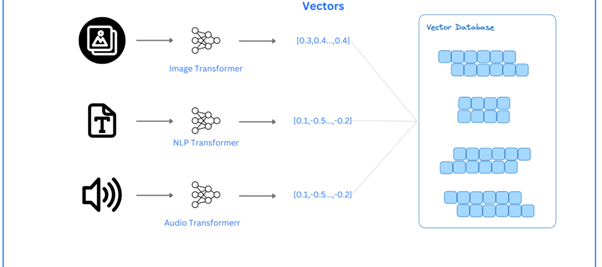

That is why we need a specialized database designed specifically for handling this data type. Vector databases like Pinecone fulfill this requirement by offering optimized storage and querying capabilities for embeddings. Vector databases have the capabilities of a traditional database that are absent in standalone vector indexes and the specialization of dealing with vector embeddings, which traditional scalar-based databases lack.

The challenge of working with vector data is that traditional scalar-based databases can’t keep up with the complexity and scale of such data, making it difficult to extract insights and perform real-time analysis. That’s where vector databases come into play – they are intentionally designed to handle this type of data and offer the performance, scalability, and flexibility you need to make the most out of your data.

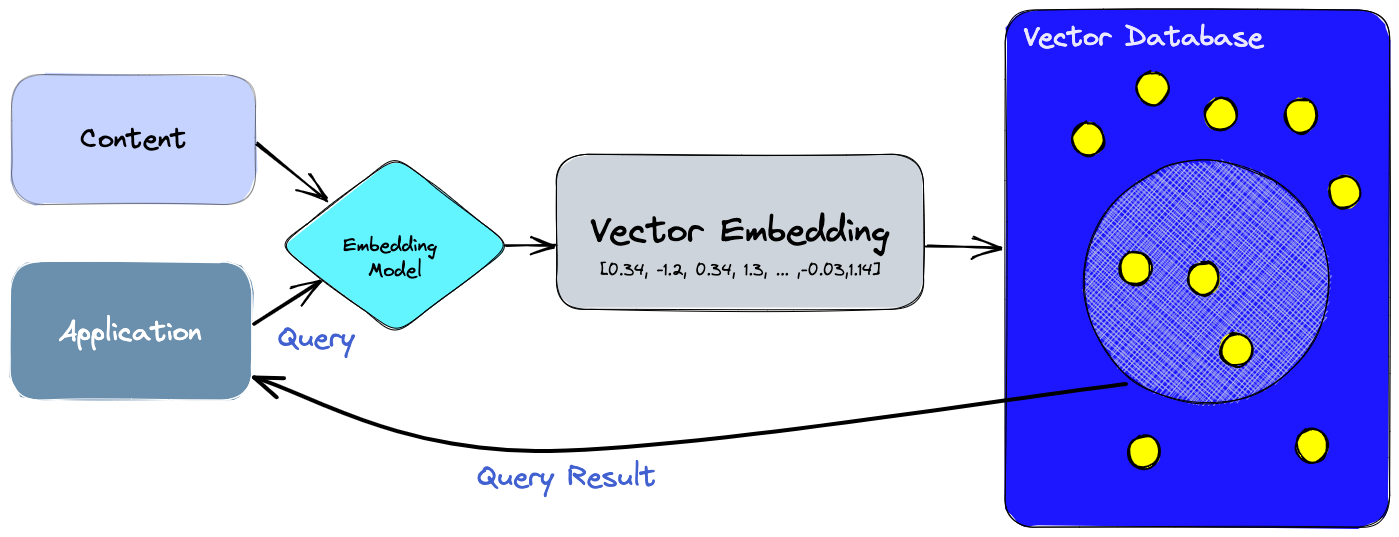

How are vector databases used?
=============================

Vector databases are typically used to power vector search use cases like visual, semantic, and multimodal search. More recently, they’re paired with generative artificial intelligence (AI) text models to create intelligent agents that provide conversational search experiences.

The development process starts with building an embedding model that’s designed to encode a corpus like product images into vectors. The data import process is also called data hydration. The application developer can now use the database to search for similar products by encoding a product image and using the vector to query for similar images.

Within the model, the k-nearest neighbor (k-NN) indexes provide efficient retrieval of vectors and apply a distance function like cosine to rank results by similarity.

What are the benefits of vector databases?
==========================================

Vector databases allow developers to innovate and create unique experiences powered by vector search. They can accelerate artificial intelligence (AI) application development and simplify the operationalization of AI-powered application workloads.

Vector databases provide an alternative to building on top of bare k-nearest neighbor (k-NN) indexes. That kind of index requires a great deal of additional expertise and engineering to use, tune and operationalize.

A good vector database provides applications with a foundation through features like data management, fault tolerance, critical security features, and a query engine. These capabilities allow users to operationalize their workloads to simplify scaling, maintain high scalability, and support security requirements.

Capabilities like the query engine and SDKs simplify application development. They also allow developers to perform more advanced queries (like searching and filtering) on metadata as part of a k-NN search. They also have the option to use hybrid relevancy scoring models that blend traditional term frequency models like BM25 with vector scores to enhance information retrieval.


## What is LLM Prompter

## What is [quantization](https://huggingface.co/docs/optimum/concept_guides/quantization)  
Also see this [reference](https://iq.opengenus.org/basics-of-quantization-in-ml/)

Quantization is a technique to reduce the computational and memory costs of running inference by representing the weights and activations with low-precision data types like 8-bit integer (int8) instead of the usual 32-bit floating point (float32).

Reducing the number of bits means the resulting model requires less memory storage, consumes less energy (in theory), and operations like matrix multiplication can be performed much faster with integer arithmetic. It also allows to run models on embedded devices, which sometimes only support integer data types.


Weights and Biases numbers that we need in backpropagation.

In 4-bit quantization, each weight or bias is represented using only 4 bits as opposed to the typical 32 bits used in single-precision floating-point format (float32).

**Why does it use less GPU Memory?**

The primary advantage of using 4-bit quantization is the reduction in model size and memory usage. Here's a simple explanation:

>A float32 number takes up 32 bits of memory.  
>A 4-bit quantized number takes up only 4 bits of memory.

So, theoretically, you can fit 8 times more 4-bit quantized numbers into the same memory space as float32 numbers. This allows you to load larger models into the GPU memory or use smaller GPUs that might not have been able to handle the model otherwise.

The amount of memory used by an integer in a computer system is directly related to the number of bits used to represent that integer.
Memory Usage for 4-bit Integer

A 4-bit integer uses 4 bits of memory.<br>

Memory Usage for 32-bit Integer<br>
A 32-bit integer uses 32 bits of memory.<br>

Conversion to Bytes<br>
To convert these to bytes (since memory is often measured in bytes):

>1 byte = 8 bits<br>
>A 4-bit integer would use ( 4/8 = 0.5 ) bytes.<br>
>A 16-bit integer would use ( 16/8 = 2 ) bytes.<br>